<span style="color:rgb(61, 61, 61);font-family:Montserrat;font-size:26.6px;font-weight:700;background-color:rgb(255, 255, 255);">The Serializable Isolation Level:<br><br></span><span style="color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;background-color:rgb(247, 247, 248);"><b>Fornece o maior grau de isolamento</b>,<b> bloqueando linhas de dados que estão sendo lidas ou gravadas por outras transações</b>. Evita todos os problemas de concorrência mencionados acima, mas pode levar a bloqueios intensos.</span>

### \*\*<mark>É também o nível de isolamento padrão especificado pelo SQL-ANSI  
  
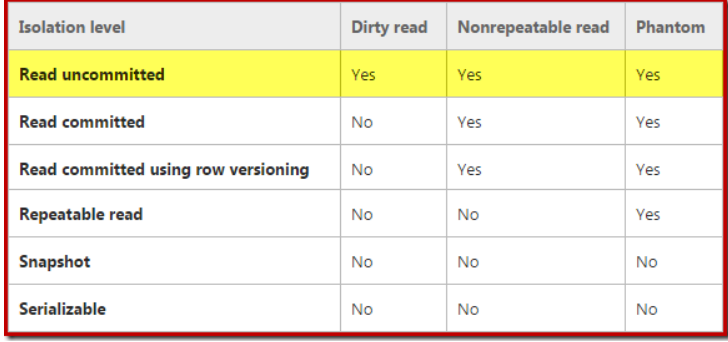  
</mark>

# **Exemplo 1**

**Passo 1: Criar a Tabela SerializableDemo Vamos criar uma tabela simples chamada "SerializableDemo" com uma coluna "Valor" para armazenar valores.**

In [1]:
DROP TABLE if EXISTS SerializableDemo;

CREATE TABLE SerializableDemo (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Valor INT
);

Commands completed successfully.

Total execution time: 00:00:00.024

**Passo 2: Inserir Dados Iniciais Inseriremos alguns dados iniciais na tabela:**

In [2]:
INSERT INTO SerializableDemo (Valor) VALUES (100), (200);

(2 rows affected)

Total execution time: 00:00:00.006

**<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Passo 3: Demonstração do Nível SERIALIZABLE</span> <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Aqui estão duas transações concorrentes que demonstram o isolamento serializável:</span>**

**<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Nessa Aba</span>**

In [3]:
-- Iniciar a transação com nível SERIALIZABLE 
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;


BEGIN TRANSACTION T1;

-- Selecionar o valor máximo na tabela
SELECT MAX(Valor) FROM SerializableDemo;

-- Aguardar por alguns segundos (simulando algum processamento)
    WAITFOR DELAY '00:00:10';


COMMIT TRANSACTION T1;

(1 row affected)

Total execution time: 00:00:10.039

(No column name)
200


### **Passo 4 : Abra uma nova conexão e crie uma nova transação**

**Abrir (<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">1.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

# **O que  está acontecendo por tras dos panos**

- <span style="color: var(--vscode-foreground);">Transação 1 começa com o nível SERIALIZABLE e seleciona o valor máximo da tabela (que é 200).</span>
    
- <span style="color: var(--vscode-foreground);">Transação 2 começa simultaneamente com o nível SERIALIZABLE e tenta inserir um novo valor na tabela (300).</span>
    
- <span style="color: var(--vscode-foreground);">O isolamento serializável bloqueia a transação 2 até que a transação 1 seja confirmada, para garantir que não haja conflitos.</span>
    
- <span style="color: var(--vscode-foreground);">Após a conclusão da transação 1, a transação 2 é liberada para continuar e insere o valor 300 na tabela.</span>
    
- ### **<mark>O isolamento serializável garante que as transações ocorram de maneira serializada, uma após a outra, para evitar conflitos de escrita concorrente.</mark>**

# **Exemplo 2**

**Passo 1:** <span style="background-color: rgb(247, 247, 248); color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 1:</span>

In [11]:
-- Iniciar a transação com nível SERIALIZABLE
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;
BEGIN TRANSACTION;

-- Selecionar e exibir os valores da tabela
SELECT * FROM SerializableDemo;

-- Aguardar por alguns segundos (simulando algum processamento)
 WAITFOR DELAY '00:00:20';

COMMIT TRANSACTION ;

(2 rows affected)

Total execution time: 00:00:20.016

ID,Valor
1,100
2,200


**Passo 2:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 2: </span> **Abrir (2<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

Resumo :

### <mark>**<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">OBS: A dica de tabela </span> `HOLDLOCK` <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">(também conhecida como </span> `XLOCK`<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">) é uma instrução usada em consultas SQL para explicitamente solicitar um bloqueio exclusivo em uma tabela durante a execução da transação. Essa dica é frequentemente usada para garantir o isolamento de transações e evitar problemas de concorrência em sistemas de gerenciamento de banco de dados.</span>**</mark>

<mark>\*\*  
<span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Quando você usa a dica </span> `HOLDLOCK` <span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">(ou </span> `XLOCK`<span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">) em uma consulta SQL, você está instruindo o sistema de banco de dados a manter um bloqueio exclusivo nas linhas de dados afetadas pela consulta até que a transação seja confirmada (comitada) ou revertida (rollback). Isso significa que outros usuários ou transações não poderão acessar essas linhas até que a transação atual seja concluída. Em outras palavras, a dica </span> `HOLDLOCK` <span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">força um bloqueio exclusivo que é mantido por toda a duração da transação.</span>**\*\***</mark>

## <mark>**SELECT \* FROM SerializableDemo   <span style="font-size: 14px; color: var(--vscode-foreground);">WITH (HOLDLOCK)</span>**</mark>

# **Exemplo 3**

**Passo 1:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 1:</span>

In [12]:
BEGIN TRAN t1

SELECT * FROM SerializableDemo WITH (HOLDLOCK)

 WAITFOR DELAY '00:00:20';

 COMMIT

(2 rows affected)

Total execution time: 00:00:20.012

ID,Valor
1,100
2,200


**Passo 2:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 2: </span>  **Abrir (3<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

# **O nível de isolamento _serializável_ fornece <span style="margin: 0px; padding: 0px; outline: none; text-rendering: optimizelegibility; max-width: 100%; color: rgb(61, 61, 61); font-family: Montserrat !important; box-sizing: border-box !important; background-color: yellow;"><font style="margin: 0px; padding: 0px; outline: none; text-rendering: optimizelegibility; max-width: 100%; vertical-align: inherit; font-family: &quot;Noto Sans&quot;, &quot;Open Sans&quot;, Calibri !important; box-sizing: border-box !important;">proteção completa</font></span> contra efeitos de simultaneidade que podem ameaçar a integridade dos dados e levar a resultados de consulta incorretos. Usar o isolamento serializável significa que, se uma transação puder produzir resultados corretos sem nenhuma atividade simultânea, ela continuará a funcionar corretamente ao competir com qualquer combinação de transações simultâneas.**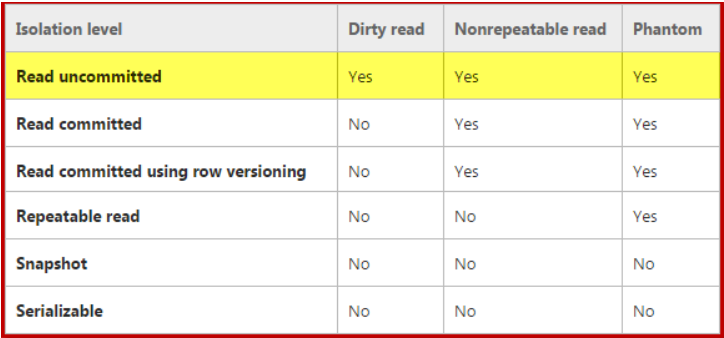